In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 8
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

This example notebook tries to create a resnet to identify 3 Indian actors: Shahrukh Khan, Salman Khan, Aamir Khan

* Did the following to get initial data set:
..* pip install google_images_download    
..* made specific data directory with folder for each actor
..* used following example command to download images from google: googleimagesdownload -k "Salman Khan" -s medium -l 100 -o . -i salmankhan
..* manually deleted images that contained multiple people, etc. to clean up data

Started with initial set of around 80, bumped it up to roughly 100 to see if training goes better.

In [4]:
path = Path('./data/bollywood'); path

WindowsPath('data/bollywood')

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=299, bs=bs).normalize(imagenet_stats)

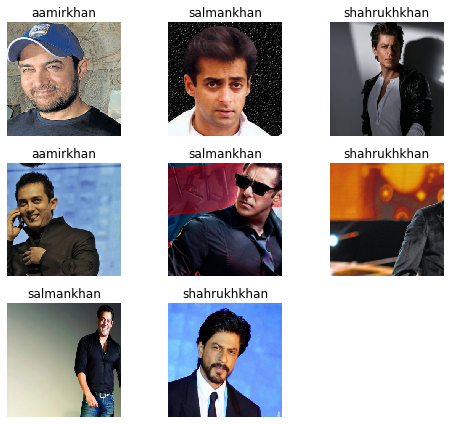

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['aamirkhan', 'salmankhan', 'shahrukhkhan'], 3, 302, 75)

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [9]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.333848,0.829544,0.360000,01:05
1,1.041731,1.154306,0.373333,00:55
2,0.834625,0.994542,0.373333,00:56
3,0.726397,0.699466,0.306667,00:56
4,0.612022,0.765628,0.266667,00:54
5,0.534288,0.731903,0.280000,00:55
6,0.465862,0.660821,0.293333,00:55
7,0.431380,0.603923,0.266667,00:56


In [10]:
learn.save('stage-1')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

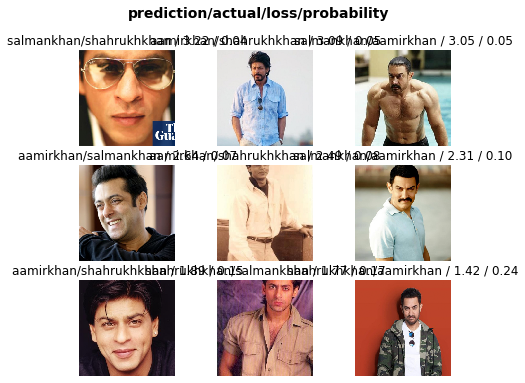

In [12]:
interp.plot_top_losses(9, figsize=(7,6))

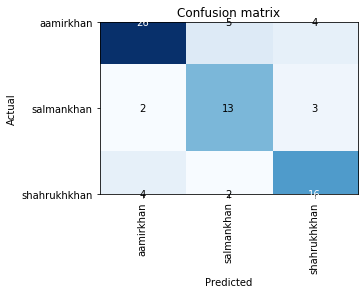

In [13]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


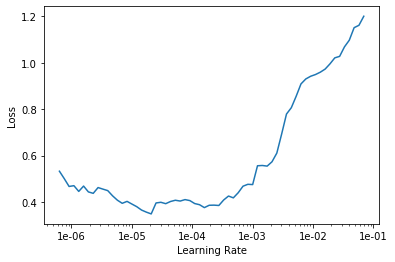

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()